# Reproducción y validación del análisis de perfiles proteómicos plasmáticos para la detección de sesgos en estudios de biomarcadores clínicos

Este notebook muestra el uso de un pipeline implementado en R para la detección
de sesgos pre-analíticos en estudios de proteómica plasmática, a partir de los
archivos de salida generados por MaxQuant.

El análisis reproduce y amplía la estrategia bioinformática propuesta por  
Geyer et al. (2019), con especial énfasis en:

- Control de calidad de las muestras
- Evaluación de la estructura multivariante mediante análisis de componentes principales (PCA)
- Análisis de modificaciones oxidativas (oxidación de metionina)
- Evaluación de valores ausentes (missing values)
- Variabilidad intra-grupo mediante el coeficiente de variación

Toda la lógica del análisis se encuentra implementada en un script externo en R,
lo que garantiza modularidad, reutilización del código y reproducibilidad del
pipeline analítico.


In [1]:
# Load required libraries
library(dplyr)
library(ggplot2)
library(tidyverse)

# Set a reproducible seed (for plotting jitter etc.)
set.seed(123)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
✔ readr     2.1.6     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load the analysis pipeline
source("pipeline.R")


[1] "Obtener los nombres de los grupos:"
[1] "run_geyer_pipeline(path = \"ruta/a/tu/dataset\", analysis_title = \"QC check\", inspect_samples = TRUE"
[1] "Para llevar a cabo el análisis:"
[1] "run_geyer_pipeline(path = \"ruta/a/tu/dataset\", group_regex = c(\"Grupo1\", \"Grupo2\", ...), group_names = c(\"Grupo1\", \"Grupo2\", ...), analysis_title = \"Título del análisis\", mod_file = \"Oxidation (M)Sites.txt\""


## Input data

### Obtención de grupos
La función 'inspect_samples' permite obtener el nombre de los grupos si son desconocidos, indicando
la ruta a los ficheros de MaxQuant.

### Análisis de resultados
El pipeline espera ficheros de salida de MaxQuant localizados en un único directorio:

- `proteinGroups.txt`
- `summary.txt`
- `Oxidation (M)Sites.txt` or `modificationSpecificPeptides.txt` (opcional)

Cada directorio corresponde a una condición experimental y se analiza independientemente.


In [3]:
run_geyer_pipeline(
  path = "txt/Blood_20Ind_combined",
  analysis_title = "QC check",
  inspect_samples = TRUE
)

Leyendo archivos...

Muestras detectadas:



 [1] "WholeBlood_F1"                  "WholeBlood_F10"                
 [3] "WholeBlood_F11"                 "WholeBlood_F12"                
 [5] "WholeBlood_F13"                 "WholeBlood_F14"                
 [7] "WholeBlood_F15"                 "WholeBlood_F16"                
 [9] "WholeBlood_F17"                 "WholeBlood_F18"                
[11] "WholeBlood_F19"                 "WholeBlood_F2"                 
[13] "WholeBlood_F20"                 "WholeBlood_F21"                
[15] "WholeBlood_F22"                 "WholeBlood_F23"                
[17] "WholeBlood_F24"                 "WholeBlood_F3"                 
[19] "WholeBlood_F4"                  "WholeBlood_F5"                 
[21] "WholeBlood_F6"                  "WholeBlood_F7"                 
[23] "WholeBlood_F8"                  "WholeBlood_F9"                 
[25] "Dilution_WholeBlood_B10_Ind_2"  "Dilution_WholeBlood_B11_Ind_3" 
[27] "Dilution_WholeBlood_B12_Ind_4"  "Dilution_WholeBlood_B9_Ind_1"  
[29] "

Define group_regex y group_names y vuelve a ejecutar.



Leyendo archivos...

Grupos asignados:




  Dilution WholeBlood 
        20         24 


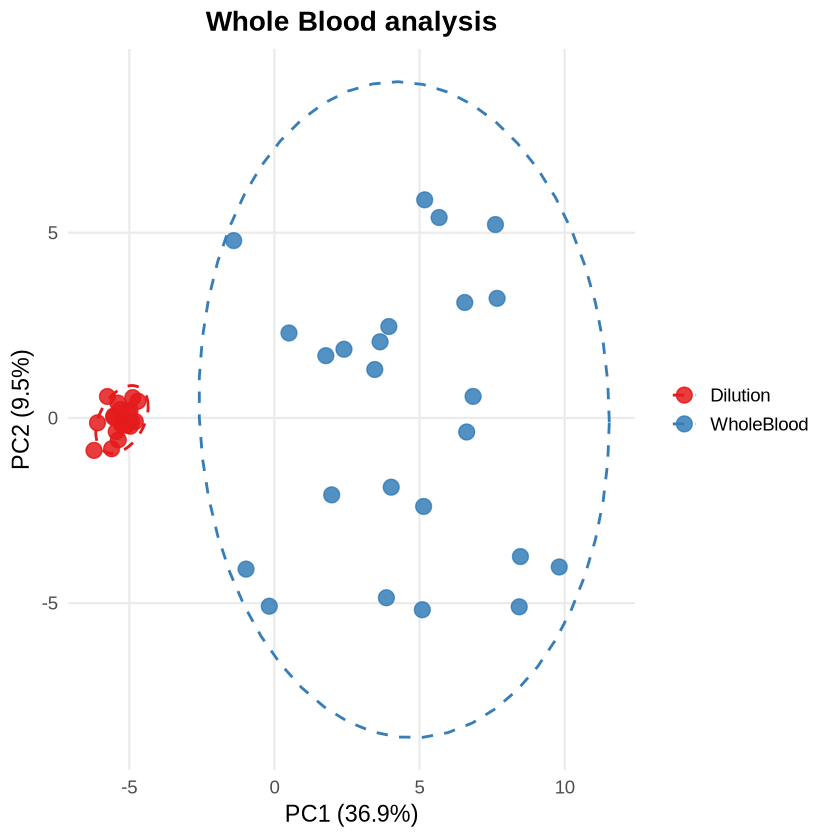

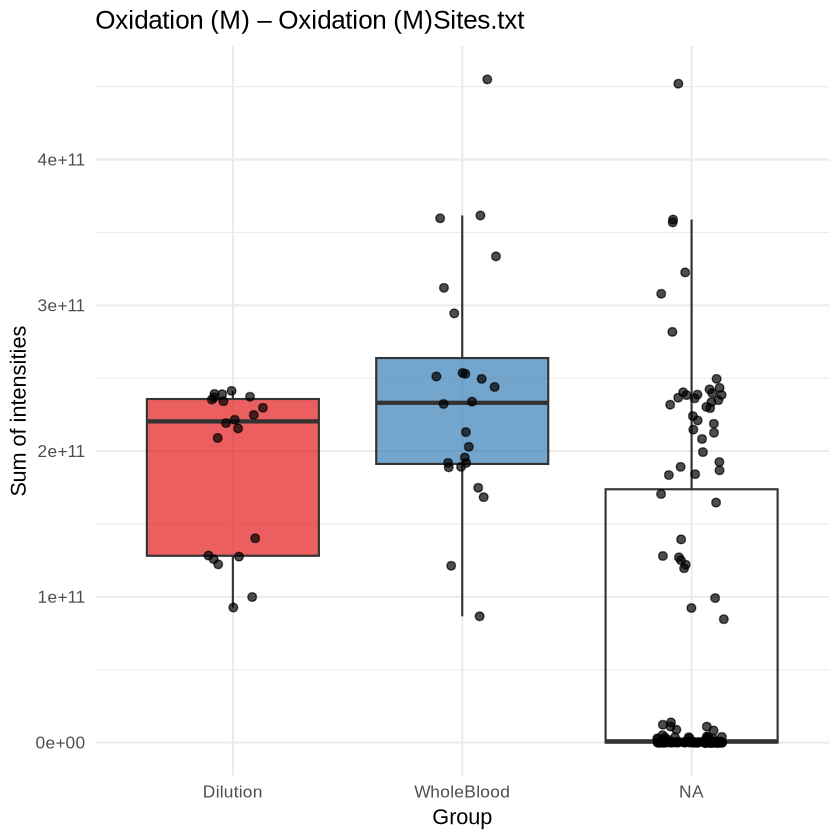

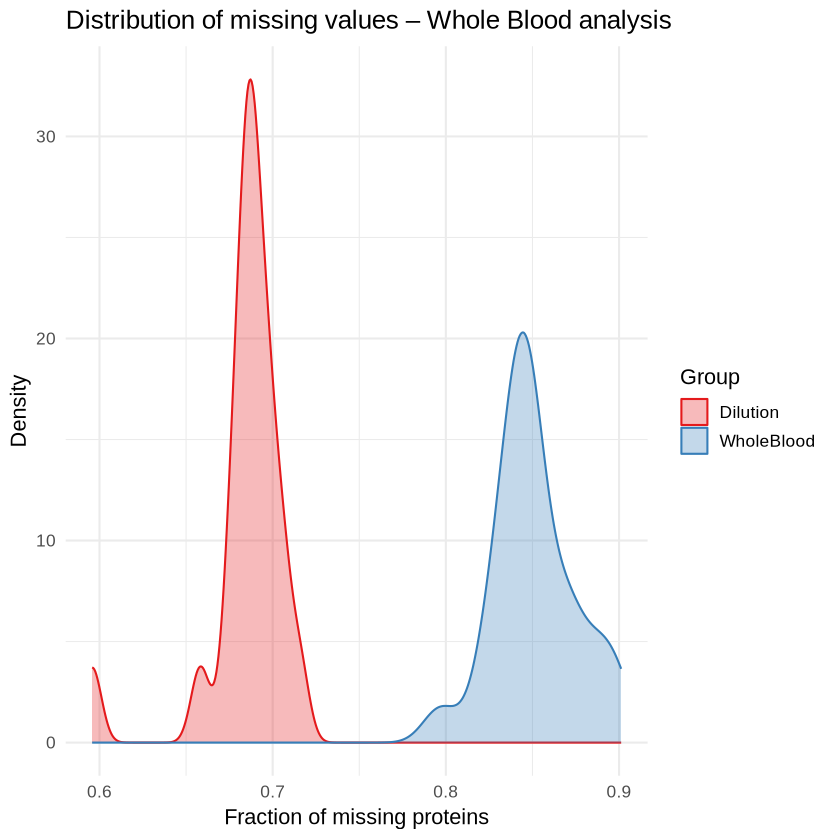

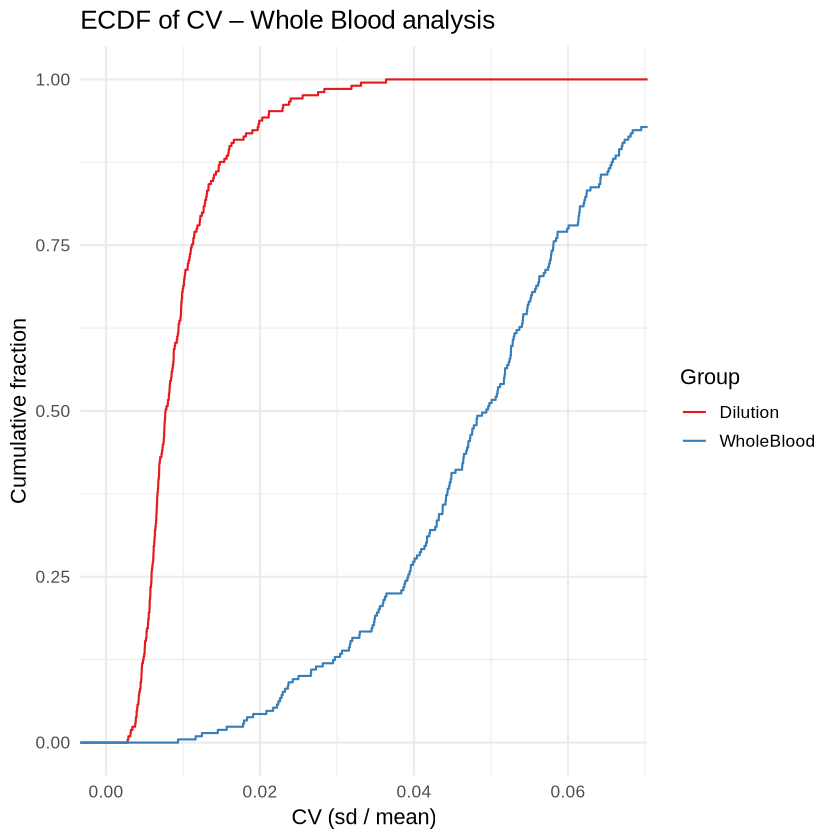

In [4]:
# Ejemplo: 
run_geyer_pipeline(
     path = "txt/Blood_20Ind_combined",
     group_regex = c("Dilution", "^WholeBlood"),
     group_names = c("Dilution", "WholeBlood"),
     analysis_title = "Whole Blood analysis",
     mod_file = "Oxidation (M)Sites.txt"
)


## Salida

Para cada análisis el pipeline genera:

- PCA
- Resúmenes de intensidad de oxidación (M)
- Fracción de valores faltantes por muestra
- Coeficiente de variación intragrupo (CV)

Todas las figuras se exportan en PNG a la carpeta `plots/`
de cada carpeta de datos.



## Reproducibilidad

- Este pipeline trabaja directamente con ficheros de salida de MaxQuant
- No es necesaria intervención manual tras la definición de los parámetros
- La asignación de grupos se lleva a cabo mendiante el uso de expresiones regulares
- El mismo script se puede aplicar a diferentes datasets sin modificar

Este diseño asegura la reproducibilidad y transparencia del control de calidad
en el estudio de proteómica plasmática.
